In [23]:
from multigrids import TemporalGrid, MultiGrid, TemporalMultiGrid
from atm.images import raster
import os

from atm.tools import initiation_areas

import numpy as np


In [3]:
data_dir = ('/Users/rwspicer/Desktop/data/V1/')
# os.listdir(data_dir)



fdd = TemporalGrid(os.path.join(data_dir, 'degree-day/freezing/ACP/v3/temporal-grid/ACP_FDD.yml'))
fdd.config['ts_offset'] = 0

tdd = TemporalGrid(os.path.join(data_dir, 'degree-day/thawing/ACP/v2/temporal-grid/ACP-TDD.yml'))
tdd.config['ts_offset'] = 0

# tdd_p1 = TemporalGrid(os.path.join(data_dir, 'degree-day/thawing/ACP/v2/temporal-grid/ACP-TDD.yml'))
# tdd_p1.config['ts_offset'] = 1

ewp = TemporalGrid(
    os.path.join(data_dir, 'precipitation/early-winter/ACP/v2/temporal-grid/ACP_early_winter_precip_mm.yml')
)
ewp.config['ts_offset'] = 0

fwp = TemporalGrid(
    os.path.join(data_dir, 'precipitation/full-winter/ACP/v2/temporal-grid/ACP_full_winter_precip_mm.yml')
)
fwp.config['ts_offset'] = 0

lsp = TemporalGrid(
    os.path.join(data_dir, 'precipitation/late-summer/ACP/v2/temporal-grid/ACP_late_summer_precip_mm.yml')
)
lsp.config['ts_offset'] = 0

sp = TemporalGrid(
    os.path.join(data_dir, 'precipitation/summer/ACP/v2/temporal-grid/ACP_summer_precip_mm.yml')
)
sp.config['ts_offset'] = 0

tdd_p1 = tdd.clone()
tdd_p1.grids[:-1] = tdd.grids[1:] # tdd_p1[0] <- tdd[1], tdd_p1[1] <- tdd[2], and so on
tdd_p1.config['ts_offset'] = 1

sp_p1 = tdd.clone()
sp_p1.grids[:-1] = sp.grids[1:] # same as tdd +1
sp_p1.config['ts_offset'] = 1

In [35]:
grid_dict = {
    "tdd": tdd,
    "ewp": ewp,
    "fwp": fwp,
    "fdd": fdd,
    "tdd+1": tdd_p1
}

bounds = [1901,1950]

ia_grid, stats_grid = initiation_areas.find_initiation_areas_vpdm(grid_dict, bounds)

ia_grid.config['dataset_version'] = '4.0.0'
ia_grid.config['dataset_name'] = 'ACP 5 var TKI  areas'
ia_grid.config['description'] = """ACP 5 var TKI areas version 4. 
    Calculated from tdd(v2), ewp(v2), fwp(v2), fdd(v3), tdd+1 (tdd v2 offset by 1 year).
"""
tkpd, md = raster.load_raster(
    os.path.join(data_dir,'thermokarst/predisposition-model/ACP/v2/ACP-tk-predisp-model.tif')
)
tkpd[ tkpd < -5] = np.nan


apply_tkpd = lambda tki: tki * ( tkpd.flatten() / 100)
ia_grid_with_predisp = ia_grid.apply_function(apply_tkpd)

ia_grid_with_predisp.config['dataset_version'] = '4.0.0'
ia_grid_with_predisp.config['dataset_name'] = 'ACP 5 var TKI  areas'
ia_grid_with_predisp.config['description'] = """ACP 5 var TKI areas version 4. 
    Calculated from tdd(v2), ewp(v2), fwp(v2), fdd(v3), tdd+1 (tdd v2 offset by 1 year).
    With predsipostiton model applied
"""

ia_grid.config['raster_metadata'] = tdd.config['raster_metadata']
ia_grid_with_predisp.config['raster_metadata']= tdd.config['raster_metadata']
stats_grid.config['raster_metadata']= tdd.config['raster_metadata']

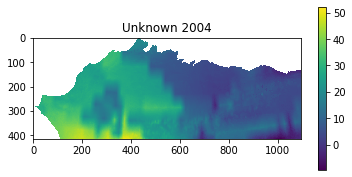

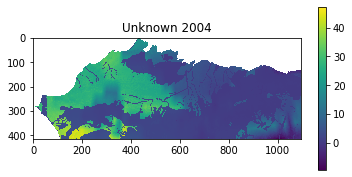

In [36]:
ia_grid.show_figure(2004)
ia_grid_with_predisp.show_figure(2004)

In [37]:
ia_grid.save(
    '/Users/rwspicer/Desktop/data/V1/thermokarst/initiation-regions/ACP/v4/PDM-5var/without_predisp/multigrid/ACP-TKI-PDM5.yml'
)
ia_grid_with_predisp.save('/Users/rwspicer/Desktop/data/V1/thermokarst/initiation-regions/ACP/v4/PDM-5var/with_predisp/multigrid/ACP-TKI-PDM5-with-predisp.yml')

stats_grid.save('/Users/rwspicer/Desktop/data/V1/thermokarst/initiation-regions/ACP/v4/PDM-stats/multigrid/ACP-TKI-stats.yml')



In [38]:
ia_grid.save_all_as_geotiff('/Users/rwspicer/Desktop/data/V1/thermokarst/initiation-regions/ACP/v4/PDM-5var/without_predisp/tiff/')
ia_grid_with_predisp.save_all_as_geotiff('/Users/rwspicer/Desktop/data/V1/thermokarst/initiation-regions/ACP/v4/PDM-5var/with_predisp/tiff/')
stats_grid.save_all_as_geotiff('/Users/rwspicer/Desktop/data/V1/thermokarst/initiation-regions/ACP/v4/PDM-stats/tiff/')